# Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.layers import Activation, Dense
from keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

C:\Users\HP\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


# Preprocessing

Load cleaned dataset

In [ ]:
df=pd.read_csv("Weather_Data_Clean.csv")

In [ ]:
df.head()

,Unnamed: 0,city,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
0,0,Qassim,2017,1,1,24,0,Clear,17,11,64.0,1018.0,16
1,1,Qassim,2017,1,1,1,0,Clear,17,6,64.0,1018.0,16
2,2,Qassim,2017,1,1,3,0,Clear,15,11,72.0,1019.0,16
3,3,Qassim,2017,1,1,4,0,Clear,15,11,72.0,1019.0,16
4,4,Qassim,2017,1,1,5,0,Clear,15,9,72.0,1019.0,16


In [ ]:
df.tail()

,city,year,month,day,hour,minute,weather,temp,wind,humidity,barometer,visibility
243366,Jawf,2019,4,30,19,0,Cloudy,32,19,14.0,1014.0,-1
243367,Jawf,2019,4,30,20,0,Cloudy,29,9,22.0,1015.0,-1
243368,Jawf,2019,4,30,21,0,Cloudy,27,7,24.0,1016.0,-1
243369,Jawf,2019,4,30,22,0,Clear,26,0,26.0,1017.0,16
243370,Jawf,2019,4,30,23,0,Clear,24,7,29.0,1017.0,16


In [ ]:
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
#x = df['weather'].str.match('pat = |(Sunny)|(Clear)|(Cloudy)')
df  = df[df.weather.isin(['Sunny', 'Clear','Cloudy'])] 
df['weather'].value_counts()

Clear     97569
Sunny     87475
Cloudy    53003
Name: weather, dtype: int64

In [ ]:
df.shape

(238047, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238047 entries, 0 to 243370
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   city        238047 non-null  object 
 1   year        238047 non-null  int64  
 2   month       238047 non-null  int64  
 3   day         238047 non-null  int64  
 4   hour        238047 non-null  int64  
 5   minute      238047 non-null  int64  
 6   weather     238047 non-null  object 
 7   temp        238047 non-null  int64  
 8   wind        238047 non-null  int64  
 9   humidity    238047 non-null  float64
 10  barometer   238047 non-null  float64
 11  visibility  238047 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 23.6+ MB


In [ ]:
df.columns

Index(['city', 'year', 'month', 'day', 'hour', 'minute', 'weather', 'temp',
       'wind', 'humidity', 'barometer', 'visibility'],
      dtype='object')

## Feature Engineering, Feature Selection, and Split Data

In [ ]:
X= df.loc[:, df.columns != 'weather']
y = df["weather"]

In [ ]:
le = LabelEncoder()
X['city'] = le.fit_transform(X['city'])

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

***
# ML Classification Section 


***

## 1st: Logistic Regression

In [ ]:
lr = LogisticRegression(random_state = 42).fit(X_train_scaled,y_train)
lr_pred = lr.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

       Clear       0.69      0.74      0.72     24230
      Cloudy       0.83      0.87      0.85     13359
       Sunny       0.65      0.58      0.61     21923

    accuracy                           0.71     59512
   macro avg       0.72      0.73      0.73     59512
weighted avg       0.71      0.71      0.71     59512



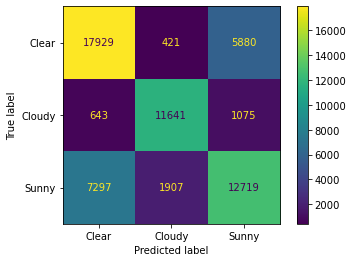

In [ ]:
plot_confusion_matrix(lr, X_test_scaled, y_test)

## 2nd: Random Forest

In [ ]:
class_forest = RandomForestClassifier(n_estimators = 200, criterion = 'gini', random_state = 42)
class_forest.fit(X_train_scaled, y_train)
forest_class = class_forest.predict(X_test_scaled)

In [ ]:
print(classification_report(y_test, forest_class))

              precision    recall  f1-score   support

       Clear       0.98      0.98      0.98     24230
      Cloudy       0.93      0.95      0.94     13359
       Sunny       0.97      0.96      0.96     21923

    accuracy                           0.97     59512
   macro avg       0.96      0.96      0.96     59512
weighted avg       0.97      0.97      0.97     59512



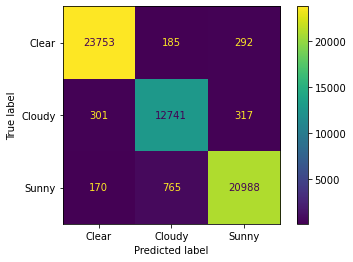

In [ ]:
plot_confusion_matrix(class_forest, X_test_scaled, y_test);

In [ ]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, forest_class)

0.963801146873941

### 3rd: XGB Classifier

In [ ]:
class_xgb = XGBClassifier(n_estimators=10,max_depth=3)
class_xgb.fit(X_train_scaled, y_train)
xgb_class = class_xgb.predict(X_test_scaled)

[19:09:49] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


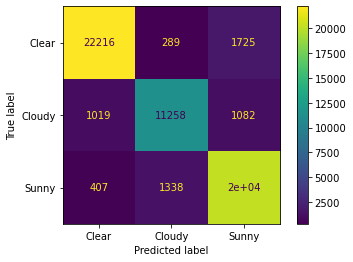

In [ ]:
plot_confusion_matrix(class_xgb, X_test_scaled, y_test);

In [ ]:
print(classification_report(y_test, xgb_class))

              precision    recall  f1-score   support

       Clear       0.94      0.92      0.93     24230
      Cloudy       0.87      0.84      0.86     13359
       Sunny       0.88      0.92      0.90     21923

    accuracy                           0.90     59512
   macro avg       0.90      0.89      0.89     59512
weighted avg       0.90      0.90      0.90     59512



## Model Optimization - Hyperparameter Tuning 

## 1st: Grid Search

In [ ]:
param_grid = {
    "n_estimators": [10,20,30,45,50], 
    "criterion": ["gini", "entropy"], 
    "max_depth": [2,4,6] 
    
}

grid = GridSearchCV(
    class_forest,
    param_grid,
    cv = 5,
    n_jobs=-1,
    verbose=1
)

grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_estimators=200,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6],
                         'n_estimators': [10, 20, 30, 45, 50]},
             verbose=1)

In [ ]:
# Add your steps here
grid.best_score_

0.9014422942280225

In [ ]:
grid.score(X_test_scaled, y_test)

0.9004066406775104

In [ ]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 6, 'n_estimators': 50}

In [ ]:
grid_class = grid.predict(X_test)

## 2nd: Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

VotingModel = VotingClassifier(
    estimators=[('Logistic Regression', lr),('Random Forest',class_forest),('Grid Search',grid),('XGB Classifier',class_xgb)], voting='hard')

VotingModel.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[20:45:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


VotingClassifier(estimators=[('Logistic Regression',
                              LogisticRegression(random_state=42)),
                             ('Random Forest',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('Grid Search',
                              GridSearchCV(cv=5,
                                           estimator=RandomForestClassifier(n_estimators=200,
                                                                            random_state=42),
                                           n_jobs=-1,
                                           param_grid={'criterion': ['gini',
                                                                     'entropy'],
                                                       'max_depth': [2, 4, 6],
                                                       'n_estimators': [...
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=3,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_estimators=10, n_jobs=8,
                                            num_parallel_tree=1,
                                            objective='multi:softprob',
                                            predictor='auto', random_state=0,
                                            reg_alpha=0, reg_lambda=1,
                                            scale_pos_weight=None, subsample=1,
                                            tree_method='exact',
                                            validate_parameters=1,
                                            verbosity=None))])

In [ ]:
predictVoting = VotingModel.predict(X_test_scaled)
accuracy_score(y_test, predictVoting)

0.915832101088856

In [ ]:
Acc ={"Logistic Regression": balanced_accuracy_score(y_test, lr_pred),
     "Random Forest": balanced_accuracy_score(y_test, forest_class),
     "XGB Classifier": balanced_accuracy_score(y_test, xgb_class),
     "Grid Search": balanced_accuracy_score(y_test, grid_class),
     "Voting Classifier":balanced_accuracy_score(y_test, predictVoting)}

In [ ]:
plt.figure(figsize=(16,8))
lists = sorted(Acc.items())
x, y = zip(*lists)
plt.plot(x, y)
plt.show()

***
# Neural Networks Section 


***

## Feature Engineering, Feature Selection, and Split Data

In [ ]:
encoder = OneHotEncoder()

encoded_Y = encoder.fit(y.values.reshape(-1,1))
encoded_Y = encoded_Y.transform(y.values.reshape(-1,1)).toarray()

encoded_Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
X_train, X_test, y_train, y_test=train_test_split(X, encoded_Y, test_size=0.20, random_state=42)

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

## 1st:

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(tf.keras.layers.Dense(units=22, activation='tanh'))
model1.add(tf.keras.layers.Dense(units=3, activation='softmax'))
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model1.fit(X_train, y_train,validation_split = 0.1, epochs = 50)

Epoch 1/50
5357/5357 [==============================] - 9s 2ms/step - loss: 0.4329 - accuracy: 0.8284 - val_loss: 0.2756 - val_accuracy: 0.8967
Epoch 2/50
5357/5357 [==============================] - 8s 2ms/step - loss: 0.2482 - accuracy: 0.8995 - val_loss: 0.2378 - val_accuracy: 0.8999
Epoch 3/50
5357/5357 [==============================] - 8s 2ms/step - loss: 0.2269 - accuracy: 0.9032 - val_loss: 0.2251 - val_accuracy: 0.9029
Epoch 4/50
5357/5357 [==============================] - 8s 1ms/step - loss: 0.2168 - accuracy: 0.9059 - val_loss: 0.2150 - val_accuracy: 0.9064
Epoch 5/50
5357/5357 [==============================] - 8s 1ms/step - loss: 0.2097 - accuracy: 0.9084 - val_loss: 0.2097 - val_accuracy: 0.9067
Epoch 6/50
5357/5357 [==============================] - 8s 1ms/step - loss: 0.2042 - accuracy: 0.9108 - val_loss: 0.2056 - val_accuracy: 0.9088
Epoch 7/50
5357/5357 [==============================] - 8s 1ms/step - loss: 0.1999 - accuracy: 0.9121 - val_loss: 0.2015 - val_accuracy:

In [ ]:
y_pred1 = model1.predict(X_test)
y_pred1 = (y_pred1 > 0.5)
print(classification_report(y_test, y_pred1))

1488/1488 [==============================] - 1s 947us/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     19414
           1       0.87      0.88      0.87     10716
           2       0.94      0.90      0.92     17480

   micro avg       0.93      0.91      0.92     47610
   macro avg       0.92      0.91      0.92     47610
weighted avg       0.93      0.91      0.92     47610
 samples avg       0.91      0.91      0.91     47610



## 2nd:

In [ ]:
model2 = Sequential()
model2.add(Dense(30,activation='sigmoid'))
model2.add(Dropout(0.25))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(19,activation='relu'))
model2.add(Dense(3,activation='softmax'))
model2.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])


In [ ]:
history2 = model2.fit(X_train, y_train,validation_split = 0.1,epochs=50,callbacks=[callback]) 

Epoch 1/50
5357/5357 [==============================] - 9s 2ms/step - loss: 0.4447 - accuracy: 0.8038 - val_loss: 0.2720 - val_accuracy: 0.8801
Epoch 2/50
5357/5357 [==============================] - 9s 2ms/step - loss: 0.2917 - accuracy: 0.8770 - val_loss: 0.2481 - val_accuracy: 0.8908
Epoch 3/50
5357/5357 [==============================] - 10s 2ms/step - loss: 0.2721 - accuracy: 0.8832 - val_loss: 0.2487 - val_accuracy: 0.8909
Epoch 4/50
5357/5357 [==============================] - 9s 2ms/step - loss: 0.2627 - accuracy: 0.8864 - val_loss: 0.2413 - val_accuracy: 0.8901
Epoch 5/50
5357/5357 [==============================] - 10s 2ms/step - loss: 0.2557 - accuracy: 0.8881 - val_loss: 0.2388 - val_accuracy: 0.8889
Epoch 6/50
5357/5357 [==============================] - 9s 2ms/step - loss: 0.2497 - accuracy: 0.8908 - val_loss: 0.2416 - val_accuracy: 0.8867
Epoch 7/50
5357/5357 [==============================] - 9s 2ms/step - loss: 0.2439 - accuracy: 0.8924 - val_loss: 0.2462 - val_accurac

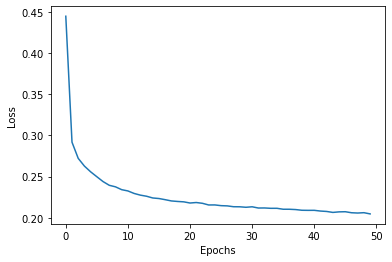

In [ ]:
loss = history2.history['loss']

plt.figure()
plt.plot(loss)
plt.xlabel("Epochs"); plt.ylabel("Loss")
plt.show()

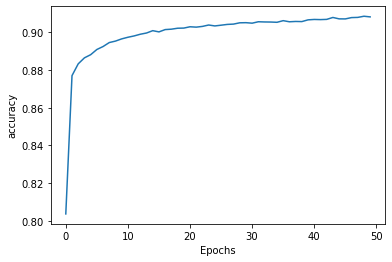

In [ ]:
acc = history2.history['accuracy']
plt.figure()
plt.plot(acc)
plt.xlabel("Epochs"); plt.ylabel("accuracy")
plt.show()

In [ ]:
y_pred2 = model2.predict(X_test)
y_pred2 = (y_pred2 > 0.5)
print(classification_report(y_test, y_pred2))

1488/1488 [==============================] - 1s 943us/step
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     19414
           1       0.89      0.82      0.85     10716
           2       0.85      0.90      0.88     17480

   micro avg       0.90      0.86      0.88     47610
   macro avg       0.90      0.86      0.88     47610
weighted avg       0.91      0.86      0.88     47610
 samples avg       0.86      0.86      0.86     47610



## 3rd:

In [ ]:
model3 = Sequential()
model3.add(Dense(22,activation='sigmoid'))
model3.add(Dense(17,activation='sigmoid'))
model3.add(Dropout(0.25))
model3.add(Dense(5,activation='sigmoid'))
model3.add(Dense(3,activation='softmax'))
model3.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history3 = model3.fit(X_train, y_train,validation_split = 0.1,epochs=50,callbacks=[callback]) 

Epoch 1/50
5357/5357 [==============================] - 10s 2ms/step - loss: 0.6332 - accuracy: 0.7025 - val_loss: 0.3566 - val_accuracy: 0.8610
Epoch 2/50
5357/5357 [==============================] - 8s 2ms/step - loss: 0.3155 - accuracy: 0.8719 - val_loss: 0.2625 - val_accuracy: 0.8941
Epoch 3/50
5357/5357 [==============================] - 10s 2ms/step - loss: 0.2736 - accuracy: 0.8875 - val_loss: 0.2514 - val_accuracy: 0.8945
Epoch 4/50
5357/5357 [==============================] - 9s 2ms/step - loss: 0.2587 - accuracy: 0.8940 - val_loss: 0.2414 - val_accuracy: 0.8996
Epoch 5/50
5357/5357 [==============================] - 10s 2ms/step - loss: 0.2497 - accuracy: 0.8976 - val_loss: 0.2364 - val_accuracy: 0.8998
Epoch 6/50
5357/5357 [==============================] - 10s 2ms/step - loss: 0.2430 - accuracy: 0.8999 - val_loss: 0.2305 - val_accuracy: 0.9018
Epoch 7/50
5357/5357 [==============================] - 8s 2ms/step - loss: 0.2349 - accuracy: 0.9008 - val_loss: 0.2219 - val_accur

In [ ]:
y_pred3 = model.predict(X_test)
y_pred3 = (y_pred3 > 0.5)
print(classification_report(y_test, y_pred3))

1488/1488 [==============================] - 1s 963us/step
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     19414
           1       0.88      0.86      0.87     10716
           2       0.94      0.91      0.92     17480

   micro avg       0.94      0.91      0.92     47610
   macro avg       0.93      0.90      0.91     47610
weighted avg       0.94      0.91      0.92     47610
 samples avg       0.91      0.91      0.91     47610



# Model Selection and Inference

Selecting the best model for each target feature

### ML

Best model is RandomForestClassifier

#### Inference

In [ ]:
prediction = class_forest.predict(sc.transform([[5, 2019, 11, 8, 19, 0, 70, 11, 40, 1010.0, 9]]))
print(f'The weather is likely to be: {prediction}')

The weather is likely to be: ['Clear']


### NN

Best model is 1st model (slightly better overall)

#### Inference

In [ ]:
prediction = model1.predict(sc.transform([[5, 2019, 11, 8, 19, 0, 50, 11, 40, 1010.0, 9]]))
print(f'The weather is likely to be: {prediction}')

1/1 [==============================] - 0s 21ms/step
The weather is likely to be: [[0.79725236 0.20142649 0.00132111]]


#### Clear: 51% , Cloudy: 48%, Sunny: 002%

# ML Pipeline for Best Model

In [ ]:
X_train_n = X_train.select_dtypes(exclude=["category", "object"])
X_test_n = X_test.select_dtypes(exclude=["category", "object"])

# Create a Pipeline for our model
pipe = make_pipeline(
    
    SimpleImputer(),   # Impute missing values
    StandardScaler(),  # scale columns 
    
    # apply the model with best parameter we got from Grid Search
    RandomForestClassifier(n_estimators = 50, criterion = 'gini', max_depth= 6, random_state = 42)
)

pipe.fit(X_train_n,y_train)
pipe.score(X_test_n, y_test)

***
# ML Regression Section 


***

### Preprocess and split dataset based on target column

A function to split the dataset to train and test, and create the target column by duplicating and shifting it upward by one row, therefore, each row's data (i.e. wind, visibility etc...) becomes the target to the preceeding row.

In [ ]:
def process_target(target, df):
    # Specify a name to the target column
    target_column = target + '_next'
    
    # Split the dataset to train and test
    train, test = train_test_split(df, test_size=0.2, random_state = 42)
    
    # Duplicate the target column and shift it up by 1
    train[target_column] = train[target].shift(-1)
    test[target_column] = test[target].shift(-1)
    
    # The target of the last column will be empty, so we can drop it 
    train.dropna(inplace=True)
    test.dropna(inplace=True)
    
    # Separate feature columns and target
    X_train = train.drop([target], axis=1)
    y_train = train[target]
    X_test = test.drop([target], axis=1)
    y_test = test[target]
    
    return X_train, y_train, X_test, y_test

### Preprocessing Pipeline

This function creates a preprocessing pipeline according to the features of the dataframe passed to it, the pipeline includes scaling numerical features and encoding categorical features

In [ ]:
def get_preprocessing_pipeline(dataframe):
    # Get names of numerical columns
    numerical_columns = list(dataframe.describe().columns)
    
    # Get names of categorical columns
    categorical_columns = list(dataframe.describe(exclude='number').columns)
    
    # Create a columns transformer for numerical and categorical columns
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numerical_columns),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_columns)
        ]
    )
    
    return preprocessor

### ANN Preprocessing Pipeline

This function creates a preprocessing pipeline that is customized for neural networks, the pipeline scales numerical features and encodes categorical features

In [ ]:
def ann_preprocessing(X_train, X_test):
    # Get names of numerical columns
    numerical_columns = list(X_train.describe().columns)
    
    # Get names of categorical columns
    categorical_columns = list(X_train.describe(exclude='number').columns)
    
    # Create a standard scaler and scale numerical columns
    scaler = StandardScaler()
    X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
    X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])
    
    # Create a label encoder and encode categorical columns
    encoder = LabelEncoder()
    X_train[categorical_columns] = X_train[categorical_columns].apply(encoder.fit_transform)
    X_test[categorical_columns] = X_test[categorical_columns].apply(encoder.fit_transform)
    
    return X_train, X_test

# Modeling (Regression)

### Evaluation Function

A function to evaluate and print models' R2 score, MAE, and MSE

In [ ]:
def evaluate(model, X_test, y_test):
    preds = model.predict(X_test)
    
    print(f'R2 score: {r2_score(y_test, preds)}')
    print(f'MAE: {mean_absolute_error(y_test, preds)}')
    print(f'MSE: {mean_squared_error(y_test, preds)}')

## Target : Temperature

In this section, the target feature will be the temperature in the next hour

In [ ]:
target = 'temp'

# Preprocess and split the dataset with temperature as a target
X_train, y_train, X_test, y_test = process_target(target, df)
preprocessor = get_preprocessing_pipeline(X_train)

### Linear Regression

In [ ]:
lr_temp = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]
)

lr_temp.fit(X_train, y_train)

# Evaluate the model
evaluate(lr_temp, X_test, y_test)

R2 score: 0.7958756934461508
MAE: 3.168988489590762
MSE: 16.017031360745534


### Random Forest Regressor

In [ ]:
rfr_temp = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=10, random_state=42))
    ]
)

rfr_temp.fit(X_train, y_train)

# Evaluate the model
evaluate(rfr_temp, X_test, y_test)

R2 score: 0.9704283104515827
MAE: 1.0592924420863647
MSE: 2.320403125348911


### XGBoost Regressor

In [ ]:
xgbr_temp = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', xgb.XGBRegressor(n_estimators=10000, random_state=42))
    ]
)

xgbr_temp.fit(X_train, y_train)

# Evaluate the model
evaluate(xgbr_temp, X_test, y_test)

R2 score: 0.9794140092792237
MAE: 0.9310592370473276
MSE: 1.6153218817167476


### ANN

In [ ]:
X_train, y_train, X_test, y_test = process_target(target, df)
X_train, X_test = ann_preprocessing(X_train, X_test)

num_inputs = X_train.shape[1]

ann_temp = tf.keras.models.Sequential()
ann_temp.add(tf.keras.layers.Dense(units=num_inputs, activation='relu'))
ann_temp.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann_temp.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann_temp.add(tf.keras.layers.Dense(units=1))

ann_temp.compile(optimizer = 'Adam', loss = 'MAE')

with tf.device('/GPU:0'):
    ann_temp.fit(X_train, y_train.values, epochs = 20, validation_data=(X_test, y_test.values))

# Evaluate the model
evaluate(ann_temp, X_test, y_test)

Epoch 1/20
6220/6220 [==============================] - 11s 2ms/step - loss: 3.1807 - val_loss: 2.3353
Epoch 2/20
6220/6220 [==============================] - 11s 2ms/step - loss: 2.2641 - val_loss: 2.2744
Epoch 3/20
6220/6220 [==============================] - 11s 2ms/step - loss: 2.1231 - val_loss: 2.1681
Epoch 4/20
6220/6220 [==============================] - 11s 2ms/step - loss: 2.0324 - val_loss: 1.9558
Epoch 5/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.9760 - val_loss: 1.9624
Epoch 6/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.9338 - val_loss: 1.9585
Epoch 7/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.8948 - val_loss: 1.8704
Epoch 8/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.8665 - val_loss: 1.8983
Epoch 9/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.8370 - val_loss: 1.7824
Epoch 10/20
6220/6220 [==============================] - 11s 2ms/step - l

## Target : Wind

In this section, the target feature will be the wind speed in the next hour

In [ ]:
target = 'wind'

# Preprocess and split the dataset with wind as a target
X_train, y_train, X_test, y_test = process_target(target, df)
preprocessor = get_preprocessing_pipeline(X_train)

### Linear Regression

In [ ]:
preprocessor = get_preprocessing_pipeline(X_train)

lr_wind = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]
)

lr_wind.fit(X_train, y_train)

# Evaluate the model
evaluate(lr_wind, X_test, y_test)

R2 score: 0.2072833758668733
MAE: 6.107379142952394
MSE: 60.85651176731168


### Random Forest Regressor

In [ ]:
rfr_wind = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=10, random_state=42))
    ]
)

rfr_wind.fit(X_train, y_train)

# Evaluate the model
evaluate(rfr_wind, X_test, y_test)

R2 score: 0.5756088937580285
MAE: 4.202412710853865
MSE: 32.58032134648364


### XGBoost Regressor

In [ ]:
xgbr_wind = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', xgb.XGBRegressor(n_estimators=10000, random_state=42))
    ]
)

xgbr_wind.fit(X_train, y_train)

# Evaluate the model
evaluate(xgbr_wind, X_test, y_test)

R2 score: 0.6001193929559019
MAE: 4.15242341083259
MSE: 30.698660942945082


In [ ]:
X_train, y_train, X_test, y_test = process_target(target, df)
X_train, X_test = ann_preprocessing(X_train, X_test)

num_inputs = X_train.shape[1]

ann_wind = tf.keras.models.Sequential()
ann_wind.add(tf.keras.layers.Dense(units=num_inputs, activation='relu'))
ann_wind.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann_wind.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann_wind.add(tf.keras.layers.Dense(units=1))

ann_wind.compile(optimizer = 'Adam', loss = 'MAE')

with tf.device('/GPU:0'):
    ann_wind.fit(X_train, y_train.values, epochs = 20, validation_data=(X_test, y_test.values))

# Evaluate the model
evaluate(ann_wind, X_test, y_test)

Epoch 1/20
6220/6220 [==============================] - 11s 2ms/step - loss: 6.1641 - val_loss: 5.9475
Epoch 2/20
6220/6220 [==============================] - 11s 2ms/step - loss: 5.8629 - val_loss: 5.8964
Epoch 3/20
6220/6220 [==============================] - 11s 2ms/step - loss: 5.7672 - val_loss: 5.7441
Epoch 4/20
6220/6220 [==============================] - 11s 2ms/step - loss: 5.7220 - val_loss: 5.7129
Epoch 5/20
6220/6220 [==============================] - 11s 2ms/step - loss: 5.6927 - val_loss: 5.6638
Epoch 6/20
6220/6220 [==============================] - 11s 2ms/step - loss: 5.6667 - val_loss: 5.6602
Epoch 7/20
6220/6220 [==============================] - 10s 2ms/step - loss: 5.6475 - val_loss: 5.6386
Epoch 8/20
6220/6220 [==============================] - 11s 2ms/step - loss: 5.6289 - val_loss: 5.6545
Epoch 9/20
6220/6220 [==============================] - 11s 2ms/step - loss: 5.6123 - val_loss: 5.5948
Epoch 10/20
6220/6220 [==============================] - 11s 2ms/step - l

## Target : Humidity

In this section, the target feature will be the humidity in the next hour

In [ ]:
target = 'humidity'

# Preprocess and split the dataset with humidity as a target
X_train, y_train, X_test, y_test = process_target(target, df)
preprocessor = get_preprocessing_pipeline(X_train)

### Linear Regression

In [ ]:
preprocessor = get_preprocessing_pipeline(X_train)

lr_humidity = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]
)

lr_humidity.fit(X_train, y_train)

# Evaluate the model
evaluate(lr_humidity, X_test, y_test)

R2 score: 0.6101213480101734
MAE: 11.643696239051204
MSE: 217.67833381895906


### Random Forest Regressor

In [ ]:
rfr_humidity = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=10, random_state=42))
    ]
)

rfr_humidity.fit(X_train, y_train)

# Evaluate the model
evaluate(rfr_humidity, X_test, y_test)

R2 score: 0.8726609907026717
MAE: 5.686741026568591
MSE: 71.09633531492423


### XGBoost Regressor

In [ ]:
xgbr_humidity = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', xgb.XGBRegressor(n_estimators=10000, random_state=42))
    ]
)

xgbr_humidity.fit(X_train, y_train)

# Evaluate the model
evaluate(xgbr_humidity, X_test, y_test)

R2 score: 0.8860448821861008
MAE: 5.626701237173273
MSE: 63.623796915456744


In [ ]:
X_train, y_train, X_test, y_test = process_target(target, df)
X_train, X_test = ann_preprocessing(X_train, X_test)

num_inputs = X_train.shape[1]

ann_humidity = tf.keras.models.Sequential()
ann_humidity.add(tf.keras.layers.Dense(units=num_inputs, activation='relu'))
ann_humidity.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann_humidity.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann_humidity.add(tf.keras.layers.Dense(units=1))

ann_humidity.compile(optimizer = 'Adam', loss = 'MAE')

with tf.device('/GPU:0'):
    ann_humidity.fit(X_train, y_train.values, epochs = 20, validation_data=(X_test, y_test.values))

# Evaluate the model
evaluate(ann_humidity, X_test, y_test)

Epoch 1/20
6220/6220 [==============================] - 11s 2ms/step - loss: 13.6677 - val_loss: 12.7334
Epoch 2/20
6220/6220 [==============================] - 11s 2ms/step - loss: 12.2845 - val_loss: 11.9955
Epoch 3/20
6220/6220 [==============================] - 11s 2ms/step - loss: 11.6483 - val_loss: 11.4232
Epoch 4/20
6220/6220 [==============================] - 11s 2ms/step - loss: 11.2540 - val_loss: 11.1279
Epoch 5/20
6220/6220 [==============================] - 10s 2ms/step - loss: 10.9720 - val_loss: 10.8910
Epoch 6/20
6220/6220 [==============================] - 11s 2ms/step - loss: 10.7031 - val_loss: 10.5914
Epoch 7/20
6220/6220 [==============================] - 10s 2ms/step - loss: 10.4983 - val_loss: 10.4565
Epoch 8/20
6220/6220 [==============================] - 11s 2ms/step - loss: 10.3125 - val_loss: 10.2279
Epoch 9/20
6220/6220 [==============================] - 11s 2ms/step - loss: 10.1550 - val_loss: 10.1147
Epoch 10/20
6220/6220 [==============================] 

## Target : Visibility

In this section, the target feature will be the visibility in the next hour

In [ ]:
target = 'visibility'

# Preprocess and split the dataset with visibility as a target
X_train, y_train, X_test, y_test = process_target(target, df)
preprocessor = get_preprocessing_pipeline(X_train)

### Linear Regression

In [ ]:
preprocessor = get_preprocessing_pipeline(X_train)

lr_visibility = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', LinearRegression())
    ]
)

lr_visibility.fit(X_train, y_train)

# Evaluate the model
evaluate(lr_visibility, X_test, y_test)

R2 score: 0.7030000397047835
MAE: 2.5688979421060676
MSE: 14.899662357229582


### Random Forest Regressor

In [ ]:
rfr_visibility = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', RandomForestRegressor(n_estimators=10, random_state=42))
    ]
)

rfr_visibility.fit(X_train, y_train)

# Evaluate the model
evaluate(rfr_visibility, X_test, y_test)

R2 score: 0.8628125641381266
MAE: 1.2965573375135657
MSE: 6.8823122803256656


### XGBoost Regressor

In [ ]:
xgbr_visibility = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('model', xgb.XGBRegressor(n_estimators=10000, random_state=42))
    ]
)

xgbr_visibility.fit(X_train, y_train)

# Evaluate the model
evaluate(xgbr_visibility, X_test, y_test)

R2 score: 0.8756884297390496
MAE: 1.5374619935331555
MSE: 6.236365897638857


In [ ]:
X_train, y_train, X_test, y_test = process_target(target, df)
X_train, X_test = ann_preprocessing(X_train, X_test)

num_inputs = X_train.shape[1]

ann_visibility = tf.keras.models.Sequential()
ann_visibility.add(tf.keras.layers.Dense(units=num_inputs, activation='relu'))
ann_visibility.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann_visibility.add(tf.keras.layers.Dense(units=100, activation='relu'))
ann_visibility.add(tf.keras.layers.Dense(units=1))

ann_visibility.compile(optimizer = 'Adam', loss = 'MAE')

with tf.device('/GPU:0'):
    ann_visibility.fit(X_train, y_train.values, epochs = 20, validation_data=(X_test, y_test.values))

# Evaluate the model
evaluate(ann_visibility, X_test, y_test)

Epoch 1/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.9555 - val_loss: 1.6875
Epoch 2/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.6031 - val_loss: 1.5658
Epoch 3/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.5383 - val_loss: 1.5458
Epoch 4/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.5139 - val_loss: 1.5108
Epoch 5/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.4935 - val_loss: 1.5038
Epoch 6/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.4804 - val_loss: 1.4721
Epoch 7/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.4707 - val_loss: 1.4729
Epoch 8/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.4643 - val_loss: 1.5232
Epoch 9/20
6220/6220 [==============================] - 11s 2ms/step - loss: 1.4603 - val_loss: 1.4848
Epoch 10/20
6220/6220 [==============================] - 11s 2ms/step - l

# Model Selection and Inference

Selecting the best model for each target feature

### Temperature

Best model for temperature forecasting is XGBoost Regressor
- R2 Score: 0.99
- MAE: 0.64
- MSE: 0.75

#### Inference

In [ ]:
target = 'temp'
X_train, y_train, X_test, y_test = process_target(target, df)
data = pd.DataFrame(np.array(['Riyadh', 6, 13, 14, 0, 'Sunny', 7, 4.0, 1007.0, 16, 34.0]).reshape(-1, 11), columns = X_test.columns)
prediction = xgbr_temp.predict(data)[0]
print(f'The temperature in the next hour is likely to be: {prediction}')

The temperature in the next hour is likely to be: 43.28396987915039


### Wind

Best model for wind speed forecasting is XGBoost Regressor
- R2 Score: 0.67
- MAE: 3.65
- MSE: 24.72

#### Inference

In [ ]:
target = 'wind'
X_train, y_train, X_test, y_test = process_target(target, df)
data = pd.DataFrame(np.array(['Assir', 12, 23, 6, 0, 'Cloudy', 0, 51.0, 1024.0, -1, 18.0]).reshape(-1, 11), columns = X_test.columns)
prediction = xgbr_wind.predict(data)[0]
print(f'The wind speed in the next hour is likely to be: {prediction}')

The wind speed in the next hour is likely to be: 3.7875802516937256


### Humidity

Best model for humidity forecasting is XGBoost Regressor
- R2 Score: 0.95
- MAE: 3.44
- MSE: 26.76

#### Inference

In [ ]:
target = 'humidity'
X_train, y_train, X_test, y_test = process_target(target, df)
data = pd.DataFrame(np.array(['Mecca', 10, 11, 8, 0, 'Sunny', 11, 59.0, 1010.0, 16, 30.0]).reshape(-1, 11), columns = X_test.columns)
prediction = xgbr_humidity.predict(data)[0]
print(f'The humidity in the next hour is likely to be: {prediction}')

The humidity in the next hour is likely to be: 84.31407165527344


### Visibility

Best model for temperature forecasting is XGBoost Regressor
- R2 Score: 0.90
- MAE: 1.09
- MSE: 4.81

#### Inference

In [ ]:
target = 'visibility'
X_train, y_train, X_test, y_test = process_target(target, df)
data = pd.DataFrame(np.array(['Madina', 6, 23, 3, 0, 'Clear', 29, 11, 11.0, 1009.0, 0.0]).reshape(-1, 11), columns = X_test.columns)
prediction = xgbr_visibility.predict(data)[0]
print(f'The visibility in the next hour is likely to be: {prediction}')

The visibility in the next hour is likely to be: 15.972837448120117
